<a href="https://colab.research.google.com/github/tikendraw/Rice_image_dataset/blob/main/Rice_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rice Classification Image Dataset


Five different Rice varieties, Arborio, Basmati, Ipsala, Jasmine and Karacadag
[Dataset](https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip)

# Get the **Data**

In [1]:
dataset_url = 'https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip'
!wget $dataset_url

#Unzip it
import zipfile
zip_ref = zipfile.ZipFile('Rice_Image_Dataset.zip')
zip_ref.extractall()
zip_ref.close()

--2022-09-11 07:26:14--  https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229550800 (219M) [application/zip]
Saving to: ‘Rice_Image_Dataset.zip’

Rice_Image_Dataset. 100%[===================>] 218.92M  16.0MB/s    in 15s     

2022-09-11 07:26:30 (14.5 MB/s) - ‘Rice_Image_Dataset.zip’ saved [229550800/229550800]



In [2]:
# Walkthrough the Directories
import os
PATH = 'Rice_Image_Dataset/'

for dirname, foldernames, files in os.walk(PATH):
    print(f"{dirname} contains {len(foldernames)} and {len(files)} image files.")

#Unwanted citation text file
! rm -rf '/Rice_Image_Dataset/Rice_Citation_Request.txt'

Rice_Image_Dataset/ contains 5 and 1 image files.
Rice_Image_Dataset/Jasmine contains 0 and 15000 image files.
Rice_Image_Dataset/Arborio contains 0 and 15000 image files.
Rice_Image_Dataset/Ipsala contains 0 and 15000 image files.
Rice_Image_Dataset/Karacadag contains 0 and 15000 image files.
Rice_Image_Dataset/Basmati contains 0 and 15000 image files.


In [3]:
# os.system('rm -rf Rice_Image_Dataset') # removes Rice_Image_Dataset if needed

# Spliting the Dataset for Train,Test and Validation

In [4]:
import os , random, shutil
from pathlib import Path
import numpy as np

def make_data_split(main_path, test_split_ratio:float  = .2 , val = True, val_split_ratio:float = .1, shuffle = True):
    '''
    Make data split Train/test/val
    
    Args:
        main_path = Dataset directory that has class subdirectory
        test_split_ratio = float value between 0 to 1
        val = bool to split for validation data
        val_split_ratio = float value for split
        shuffle = shuffle
    
    Returns:
        Splited DATASET (train/test/validation)
        
    '''
    main  = Path(main_path)
    class_names = sorted([i.name for i in main.iterdir()])
    print(class_names)
    total_files = len(os.listdir(main/class_names[0]))
    try:
        # create train/test/validation
        os.makedirs(main/'train')

        # creating test set
        os.makedirs(main/'test')
        test_image_num = 0
        test_image_num = int(total_files*test_split_ratio)
        print('test images:',test_image_num)
        for class_name in class_names:
            class_path = main/class_name
            if shuffle:
                sample_images = random.sample(os.listdir(class_path), test_image_num)

            else:
                sample_images = sorted(os.listdir(class_path))[:test_image_num]

            sample_images = [class_path/i for i in sample_images]
            test_class = str(main/'test'/class_name)
            os.makedirs(test_class)
            for file in sample_images:
                shutil.move(str(file), test_class)

        #creating validation dataset
        val_image_num = 0
        if val:
            os.makedirs(main/'validation')
            val_image_num = int(total_files*val_split_ratio)
            print('val images:',val_image_num)
            for class_name in class_names:
                class_path = main/class_name
                if shuffle:
                    sample_images = random.sample(os.listdir(class_path), val_image_num)

                else:
                    sample_images = sorted(os.listdir(class_path))[:val_image_num]

                sample_images = [class_path/i for i in sample_images]
                test_class = str(main/'validation'/class_name)
                os.makedirs(test_class)
                for file in sample_images:
                    shutil.move(str(file), test_class)

        for class_name in class_names:
            shutil.move(str(main/class_name), str(main/'train'/class_name))

        print('train images:', total_files - test_image_num - val_image_num)
    except Exception as e:
        print('Exception Occured: ',e)


In [5]:
make_data_split(PATH, test_split_ratio = .1, val = True, val_split_ratio=.1)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
test images: 1500
val images: 1500
train images: 12000


In [6]:
for dirname, foldernames, files in os.walk(PATH):
    print(f"{dirname} contains {len(foldernames)} and {len(files)} image files.")


Rice_Image_Dataset/ contains 3 and 0 image files.
Rice_Image_Dataset/validation contains 5 and 0 image files.
Rice_Image_Dataset/validation/Jasmine contains 0 and 1500 image files.
Rice_Image_Dataset/validation/Arborio contains 0 and 1500 image files.
Rice_Image_Dataset/validation/Ipsala contains 0 and 1500 image files.
Rice_Image_Dataset/validation/Karacadag contains 0 and 1500 image files.
Rice_Image_Dataset/validation/Basmati contains 0 and 1500 image files.
Rice_Image_Dataset/test contains 5 and 0 image files.
Rice_Image_Dataset/test/Jasmine contains 0 and 1500 image files.
Rice_Image_Dataset/test/Arborio contains 0 and 1500 image files.
Rice_Image_Dataset/test/Ipsala contains 0 and 1500 image files.
Rice_Image_Dataset/test/Karacadag contains 0 and 1500 image files.
Rice_Image_Dataset/test/Basmati contains 0 and 1500 image files.
Rice_Image_Dataset/train contains 5 and 0 image files.
Rice_Image_Dataset/train/Jasmine contains 0 and 12000 image files.
Rice_Image_Dataset/train/Arborio

# Visualizing the DATA

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
def plot_random_dataset(main_path, row:int = 2, col:int = 5, figsize:tuple= (15,6), recursive = True):

    '''
    Plots random images from the Path provided
    
    Args:
      main_path:str = path to the directory
      row:int       = number of rows needed
      col:int		  = number of columns needed
      figsize		 = size of the figure 

      Returns:
          A figure of row*cols of random images from dataset

    '''
    main_path = Path(main_path)
    all_images = []
    image_extension = ['jpg','jpeg','png','tiff','webp','svg','pjpeg']  
    
    if recursive:# walk through all dir and get images
          for dir, folders, files in os.walk(main_path):
              filles = [dir+'/'+i for i in files if i.split('.')[-1] in image_extension]
              all_images += filles
    else:
      for i in main_path.iterdir():
        if i.suffix in image_extension:
          all_images.append(i)
    #sampling random images 
    sample_images = random.sample(all_images, row*col)

    # plotting figure
    fig = plt.figure(figsize = figsize)

    if len(all_images) <= 0:
      print('No Image Found', len(all_images))

    for i,image in enumerate(sample_images):
        title = str(image).split('/')[-2]
        img = mpimg.imread(image)
        plt.subplot(row, col, i+1)
        plt.title(title)
        plt.imshow(img)
    
    fig.suptitle(PATH)
    plt.show()


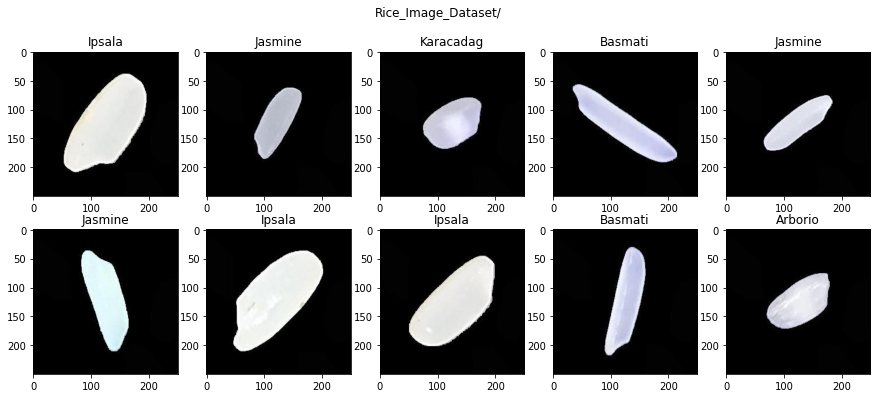

In [9]:
plot_random_dataset(PATH+'/'+'train')

# Creating Tensor Data

In [10]:
from urllib.request import parse_http_list
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_path = PATH+'train'
test_path = PATH  + 'test'
val_path = PATH + 'validation'

IMG_SIZE = (256,256)
BATCH_SIZE = 64

train_data = image_dataset_from_directory(directory = train_path,
                                          label_mode = 'categorical',
                                          color_mode = 'grayscale',   # grayscale because there is not much details in color and its will save time
                                          batch_size = BATCH_SIZE,
                                          image_size = IMG_SIZE,
                                          )

test_data = image_dataset_from_directory(directory = test_path,
                                          label_mode = 'categorical',
                                          color_mode = 'grayscale',
                                          batch_size = BATCH_SIZE,
                                          image_size = IMG_SIZE,
                                          shuffle = False
                                          )

val_data = image_dataset_from_directory(directory = val_path,
                                          label_mode = 'categorical',
                                          color_mode = 'grayscale',
                                          batch_size = BATCH_SIZE,
                                          image_size = IMG_SIZE,
                                          )

Found 60000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.


# Creating Model

# Base Model

In [11]:
from tensorflow.python.ops.gen_array_ops import InplaceUpdate
# ANN FUnctional model

input = tf.keras.Input(shape = (256,256,1), name = 'input') 
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(units = 100, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 50, activation = 'relu')(x)
x =  tf.keras.layers.Dense(units = 25, activation = 'relu')(x)
output = tf.keras.layers.Dense(units = 5 ,activation='softmax', name = 'output')(x)


ann_model_base = tf.keras.Model(input, output, name = 'ann_model_base')

# compile model
ann_model_base.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [12]:
#creating an early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode="auto"
)

In [13]:
# create a tensorboard function
def create_tensorboard_callback(filepath, experiment_name, **kwargs):
    if not filepath.endswith('/'):
        filepath = filepath+'/'
    
    full_path  = filepath + experiment_name
    
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = full_path, **kwargs)
    return tensorboard_callback

In [16]:
EPOCHS = 5

In [17]:
from gc import callbacks
history_base = ann_model_base.fit(train_data, 
                                  epochs = EPOCHS,
                                  steps_per_epoch = len(train_data),
                                  validation_data = val_data,
                                  validation_steps = len(val_data),
                                  callbacks = [early_stopping,create_tensorboard_callback('tensorboard_log','ann_model_base')])

Epoch 1/5
938/938 [==============================] - 44s 47ms/step - loss: 1.2118 - accuracy: 0.9451 - val_loss: 1.5963 - val_accuracy: 0.9292
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.9143 - accuracy: 0.9429 - val_loss: 0.4776 - val_accuracy: 0.9499
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.4362 - accuracy: 0.9215 - val_loss: 0.2436 - val_accuracy: 0.9436
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.2050 - accuracy: 0.9467 - val_loss: 0.1783 - val_accuracy: 0.9508
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.1954 - accuracy: 0.9459 - val_loss: 0.2518 - val_accuracy: 0.9447


##Evaluating base model

In [18]:
# evaluating on test_data
result_base = ann_model_base.evaluate(test_data)
result_base

118/118 [==============================] - 5s 40ms/step - loss: 0.2838 - accuracy: 0.9469


[0.28381139039993286, 0.9469333291053772]

In [19]:
# getting true labels
ytrue=[]
for images, labels in test_data.unbatch():
    ytrue.append(labels.numpy().argmax())

ytrue[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
# preditcting on test data
ypred_base_proba = ann_model_base.predict(test_data)
ypred_base = ypred_base_proba.argmax(axis = 1 )
ypred_base[:10]

array([0, 0, 0, 4, 0, 0, 0, 0, 0, 4])

In [21]:
#creating a funtion to plot confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_curve, auc

import seaborn as sns
classes = train_data.class_names

def plot_classification_report(y_true = None, y_pred = None, class_names:list = None, **kwargs):
    print(classification_report(y_true,y_pred, target_names = class_names))

    cm = confusion_matrix(y_true, y_pred )
    sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = class_names, yticklabels = class_names, **kwargs)
    plt.xlabel('predicted')
    plt.ylabel('True label')


              precision    recall  f1-score   support

     Arborio       0.97      0.93      0.95      1500
     Basmati       0.95      0.92      0.94      1500
      Ipsala       1.00      0.97      0.98      1500
     Jasmine       0.87      0.95      0.91      1500
   Karacadag       0.96      0.97      0.97      1500

    accuracy                           0.95      7500
   macro avg       0.95      0.95      0.95      7500
weighted avg       0.95      0.95      0.95      7500



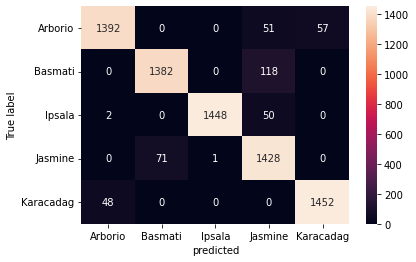

In [22]:
plot_classification_report(ytrue, ypred_base, class_names = classes)

In [23]:
#creating function that lets us see the data, prediction and true value altogather
from functools import lru_cache

def show_prediction(test_data, ypred_proba, row:int = 1, col:int = 4, figsize:tuple = (20,8)):
    '''
    Plots random images from test data of type tf.dataset and its predicted values with probabilities

    Args:
        test_data: tf.dataset type test dataset
        ypred_proba: prediction that has probality and not argmaxed int(s)
        row: number of rows to be ploted
        col: number of columns to be ploted
        figsize: size to the plot(must be tuple)
    
    Returns:
        a plot of random image from test_dataset and its predicted values side by side
    '''
    classes = test_data.class_names
    xtest = []
    ytest = []

    @lru_cache(maxsize=None)
    def get_data():
        for image, label in test_data.unbatch():
            xtest.append(image)
            ytest.append(np.argmax(label))
    get_data()

    def plot_image(num) :       
        yprob = tf.reduce_max(ypred_proba[num])
        pred_label =  classes[yargs[num].numpy()]
        true_label = classes[ytest[num]]
        if pred_label == true_label:
            color = 'green'
        else:
            color =  'red'
        plt.imshow(np.squeeze(xtest[num]))
        plt.title( f'{pred_label} {yprob:.2f} % Actual:{true_label}' , color = color)

    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],"{:.2f}".format(y[i]))

    def plot_proba(classes, num):
        plt.grid(True)
        plt.bar(classes, ypred_proba[num], label = 'Predicted')
        addlabels(classes, ypred_proba[num])
        plt.xticks(rotation = 30)
        plt.ylim([0,1])
        
    yargs = tf.argmax(ypred_proba, axis = 1)

    plt.figure(figsize = figsize)

    i = 0
    for _ in range(int(col*row/2)):
        num = random.randint( 0, len(xtest))
        # plot random image and its predicted values 
        plt.subplot(row,col,i+1)
        plot_image(num)
        plt.subplot(row,col,i+2)
        plot_proba(classes, num)
        i+=2

        # plt.bar(label_list, ytest[num], color="#333777", label = 'True')
    plt.suptitle('Prediction Plot')
    plt.show()


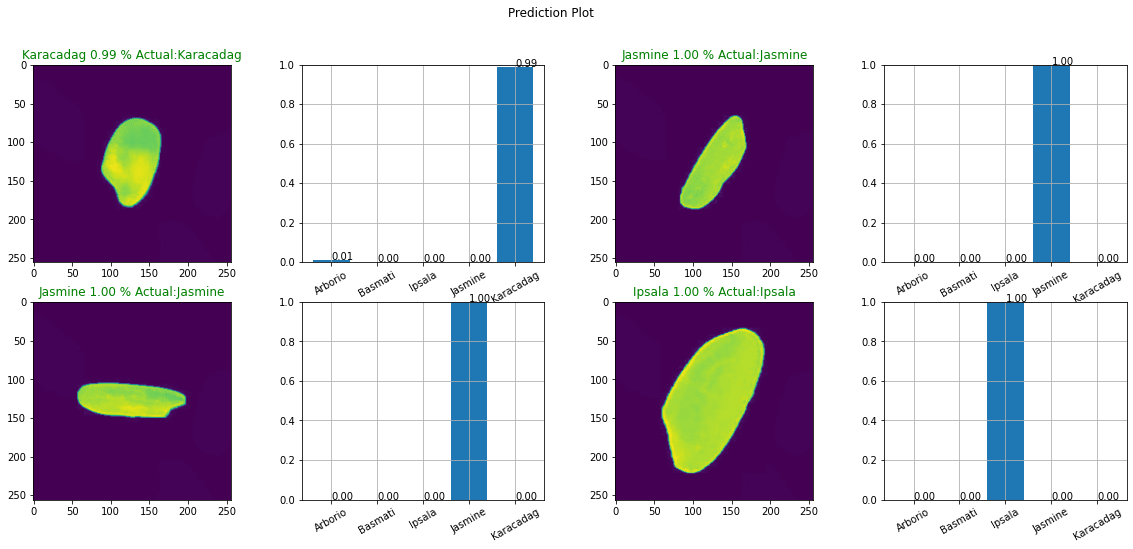

In [24]:
# ploting some prediction
show_prediction(test_data, ypred_proba=ypred_base_proba,row = 2)

**Base Model**:
our base model performed very well but for regularize the model we will augment the data.



---



---



# Experiments
 We will run series of experiments with the model and see their performance
 
 *`ann_model_base` - baseline ann model

 *`model_1` - base model with image augmentation
 
 *`model_2` - a cnn model
 
 *`model_3` - a cnn model with image augmentation

#Model_1 (Base model with Image Augmentation)

In [25]:
preprocessing_layer0 = tf.keras.Sequential([
                                       tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                      tf.keras.layers.experimental.preprocessing.RandomRotation(20),
                                      tf.keras.layers.experimental.preprocessing.RandomZoom(.3)

])

In [26]:
from tensorflow.python.ops.gen_math_ops import xdivy
# ANN FUnctional model the augmentation

input = tf.keras.Input(shape = (256,256,1), name = 'input')
x = preprocessing_layer0(input)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 100, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 50, activation = 'relu')(x)
x =  tf.keras.layers.Dense(units = 25, activation = 'relu')(x)
output = tf.keras.layers.Dense(units = 5 ,activation='softmax', name = 'output')(x)


model_1 = tf.keras.Model(input, output, name = 'model_1')

# compile model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [27]:
#training
history_1 = model_1.fit(train_data, 
                                  epochs = EPOCHS,
                                  steps_per_epoch = len(train_data),
                                  validation_data = val_data,
                                  validation_steps = len(val_data),
                                  callbacks = [create_tensorboard_callback('tensorboard_log','model_1')])

Epoch 1/5
938/938 [==============================] - 50s 52ms/step - loss: 27.5438 - accuracy: 0.7351 - val_loss: 6.1377 - val_accuracy: 0.8085
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 5.2794 - accuracy: 0.8282 - val_loss: 1.7483 - val_accuracy: 0.8875
Epoch 3/5
938/938 [==============================] - 46s 48ms/step - loss: 2.4615 - accuracy: 0.8323 - val_loss: 0.7787 - val_accuracy: 0.9021
Epoch 4/5
938/938 [==============================] - 46s 49ms/step - loss: 1.4199 - accuracy: 0.8214 - val_loss: 1.1823 - val_accuracy: 0.7915
Epoch 5/5
938/938 [==============================] - 46s 48ms/step - loss: 0.9824 - accuracy: 0.8117 - val_loss: 0.3519 - val_accuracy: 0.8833


## Evaluation

In [28]:
# evaluating on test_data
result_m1 = model_1.evaluate(test_data)
result_m1  

118/118 [==============================] - 5s 40ms/step - loss: 0.3556 - accuracy: 0.8800


[0.35564690828323364, 0.8799999952316284]

In [29]:
# preditcting on test data
ypred_m1_proba = model_1.predict(test_data)
ypred_m1 = ypred_m1_proba.argmax(axis = 1 )
ypred_m1[:10]

array([0, 4, 2, 4, 0, 0, 0, 0, 0, 4])

              precision    recall  f1-score   support

     Arborio       0.83      0.83      0.83      1500
     Basmati       0.89      0.87      0.88      1500
      Ipsala       0.93      0.87      0.90      1500
     Jasmine       0.86      0.88      0.87      1500
   Karacadag       0.90      0.96      0.93      1500

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



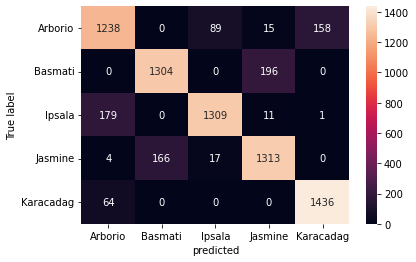

In [30]:
plot_classification_report(ytrue, ypred_m1, class_names = classes)

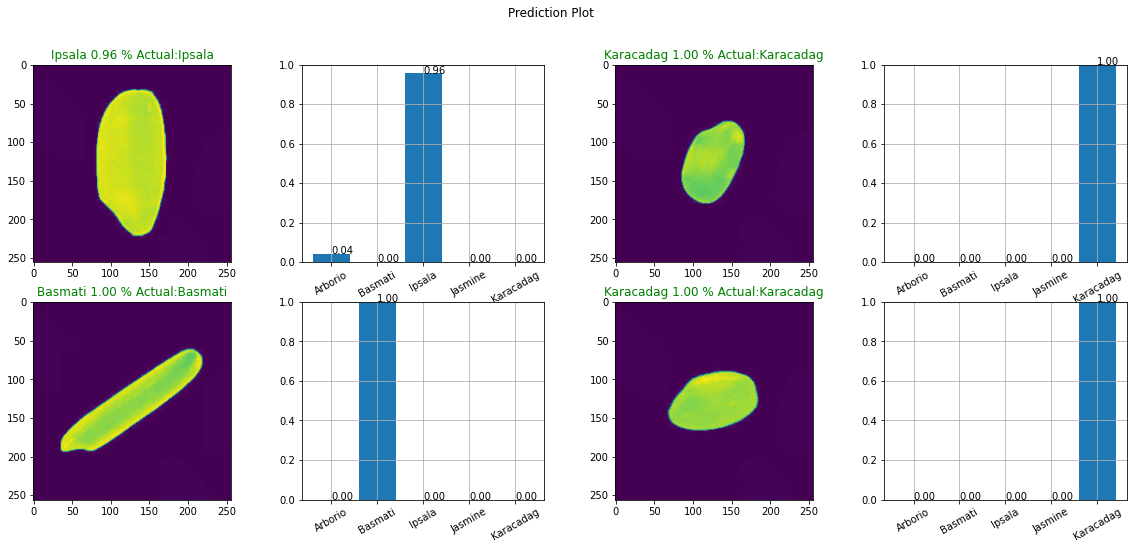

In [31]:
# ploting some prediction
show_prediction(test_data, ypred_proba=ypred_m1_proba,row = 2)

**Model_1 notes**

 Model 1 (baseline model with Image Augmentation) performed worse than base Model, because ann model rely on the digit values rather than patterns , so if there is change in orientation or size the ann models do not perform well

# Model_2 (CNN model)

In [32]:
rescaling_layer = tf.keras.Sequential([
                                       tf.keras.layers.Rescaling(1./255)
])

In [33]:
# ANN FUnctional model the augmentation
from tensorflow.keras import layers
input = tf.keras.Input(shape = (256,256,1), name = 'input')
x = rescaling_layer(input)

x  = layers.Conv2D(filters = 5, kernel_size = 3,strides=(1, 1),activation = 'relu')(x) 
x  = layers.Conv2D(filters = 5, kernel_size = 3,strides=(1, 1), activation = 'relu') (x)
x  = layers.MaxPooling2D((2, 2))(x)
x  = layers.Conv2D(filters = 5, kernel_size = 3,strides=(1, 1), activation = 'relu') (x)
x  = layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)

x =  tf.keras.layers.Dense(units = 25, activation = 'relu')(x)
output = tf.keras.layers.Dense(units = 5 ,activation='softmax', name = 'output')(x)


model_2 = tf.keras.Model(input, output, name = 'model_2')

# compile models
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [34]:
#training
history_2 = model_2.fit(train_data, 
                                  epochs = EPOCHS,
                                  steps_per_epoch = len(train_data),
                                  validation_data = val_data,
                                  validation_steps = len(val_data),
                                  callbacks = [create_tensorboard_callback('tensorboard_log','model_2')])

Epoch 1/5
938/938 [==============================] - 73s 68ms/step - loss: 0.1484 - accuracy: 0.9489 - val_loss: 0.1049 - val_accuracy: 0.9647
Epoch 2/5
938/938 [==============================] - 58s 61ms/step - loss: 0.0806 - accuracy: 0.9716 - val_loss: 0.0819 - val_accuracy: 0.9735
Epoch 3/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0694 - accuracy: 0.9755 - val_loss: 0.0774 - val_accuracy: 0.9737
Epoch 4/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0615 - accuracy: 0.9789 - val_loss: 0.0730 - val_accuracy: 0.9748
Epoch 5/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0551 - accuracy: 0.9808 - val_loss: 0.0831 - val_accuracy: 0.9733


## Evaluation

In [35]:
# evaluating on test_data
result_m2 = model_2.evaluate(test_data)
result_m2

118/118 [==============================] - 5s 44ms/step - loss: 0.0773 - accuracy: 0.9743


[0.0773351788520813, 0.9742666482925415]

In [36]:
# preditcting on test data
ypred_m2_proba = model_2.predict(test_data)
ypred_m2 = ypred_m2_proba.argmax(axis = 1 )
ypred_m2[:10]

array([0, 0, 0, 4, 0, 0, 0, 0, 0, 4])

              precision    recall  f1-score   support

     Arborio       0.97      0.96      0.97      1500
     Basmati       0.98      0.96      0.97      1500
      Ipsala       0.99      1.00      0.99      1500
     Jasmine       0.96      0.97      0.97      1500
   Karacadag       0.97      0.98      0.97      1500

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500



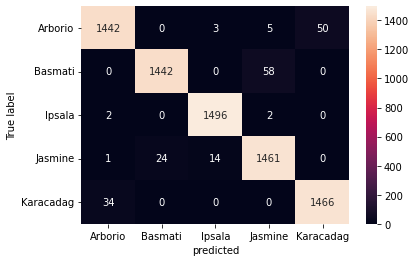

In [37]:
plot_classification_report(ytrue, ypred_m2, class_names = classes)

# Model_3 (CNN with Data Augmentation)

In [38]:
preprocessing_layer = tf.keras.Sequential([
                                       tf.keras.layers.Rescaling(1./255),
                                       tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                      tf.keras.layers.experimental.preprocessing.RandomRotation(20),

])

In [39]:
# ANN FUnctional model the augmentation
from tensorflow.keras import layers
input = tf.keras.Input(shape = (256,256,1), name = 'input')

x = preprocessing_layer(input)

x  = layers.Conv2D(filters = 5, kernel_size = 3,strides=(1, 1),activation = 'relu')(x) 
x  = layers.Conv2D(filters = 5, kernel_size = 3,strides=(1, 1), activation = 'relu') (x)
x  = layers.MaxPooling2D((2, 2))(x)
x  = layers.Conv2D(filters = 5, kernel_size = 3,strides=(1, 1), activation = 'relu') (x)
x  = layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)

x =  tf.keras.layers.Dense(units = 25, activation = 'relu')(x)
output = tf.keras.layers.Dense(units = 5 ,activation='softmax', name = 'output')(x)


model_3 = tf.keras.Model(input, output, name = 'model_3')

# compile models
model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [40]:
#training
history_3 = model_3.fit(train_data, 
                                  epochs = EPOCHS,
                                  steps_per_epoch = len(train_data),
                                  validation_data = val_data,
                                  validation_steps = len(val_data),
                                  callbacks = [create_tensorboard_callback('tensorboard_log','model_3')])

Epoch 1/5
938/938 [==============================] - 63s 66ms/step - loss: 0.1558 - accuracy: 0.9462 - val_loss: 0.0982 - val_accuracy: 0.9680
Epoch 2/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0912 - accuracy: 0.9694 - val_loss: 0.0808 - val_accuracy: 0.9729
Epoch 3/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0847 - accuracy: 0.9713 - val_loss: 0.0798 - val_accuracy: 0.9723
Epoch 4/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0813 - accuracy: 0.9728 - val_loss: 0.0807 - val_accuracy: 0.9732
Epoch 5/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0764 - accuracy: 0.9743 - val_loss: 0.0860 - val_accuracy: 0.9719


## Evaluation model_3

In [41]:
# evaluating on test_data
result_m3 = model_3.evaluate(test_data)

result_m3

118/118 [==============================] - 5s 42ms/step - loss: 0.0828 - accuracy: 0.9711


[0.08279530704021454, 0.9710666537284851]

In [42]:
# preditcting on test data
ypred_m3_proba = model_3.predict(test_data)
ypred_m3 = ypred_m3_proba.argmax(axis = 1 )
ypred_m3[:10]

array([0, 0, 0, 4, 0, 0, 0, 0, 0, 4])

              precision    recall  f1-score   support

     Arborio       0.96      0.97      0.96      1500
     Basmati       0.99      0.95      0.97      1500
      Ipsala       1.00      0.99      0.99      1500
     Jasmine       0.94      0.98      0.96      1500
   Karacadag       0.97      0.96      0.97      1500

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500



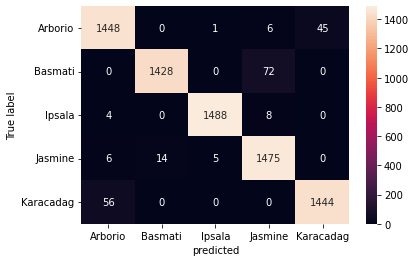

In [43]:
plot_classification_report(ytrue, ypred_m3, class_names = classes)

In [44]:
import warnings
warnings.filterwarnings('ignore')

def plot_metrics(histos:dict = None, figsize:tuple = (20,10)):
  plt.figure(figsize = figsize)
  
  for i, ii in histos.items():
    plt.subplot(2,2,1)
    plt.grid(True)
    plt.plot(ii.history['loss'],marker = 'o', label = i)
    plt.ylabel('loss')
    plt.legend()
  for j , jj in histos.items():
    plt.subplot(2,2,3)
    plt.grid(True)
    plt.plot(jj.history['accuracy'],marker = 'o',label = j)
    plt.ylabel('accuracy')
    plt.legend()
  for k , kk in histos.items():
    plt.subplot(2,2,2)
    plt.grid(True)
    plt.plot(kk.history['val_loss'],marker = 'o', label = k)
    plt.ylabel('val_loss')
    plt.legend()
  for l,ll in histos.items():
    plt.subplot(2,2,4)
    plt.grid(True)
    plt.plot(ll.history['val_accuracy'],marker = 'o',label = l)
    plt.ylabel('val_accuracy')
    plt.legend()

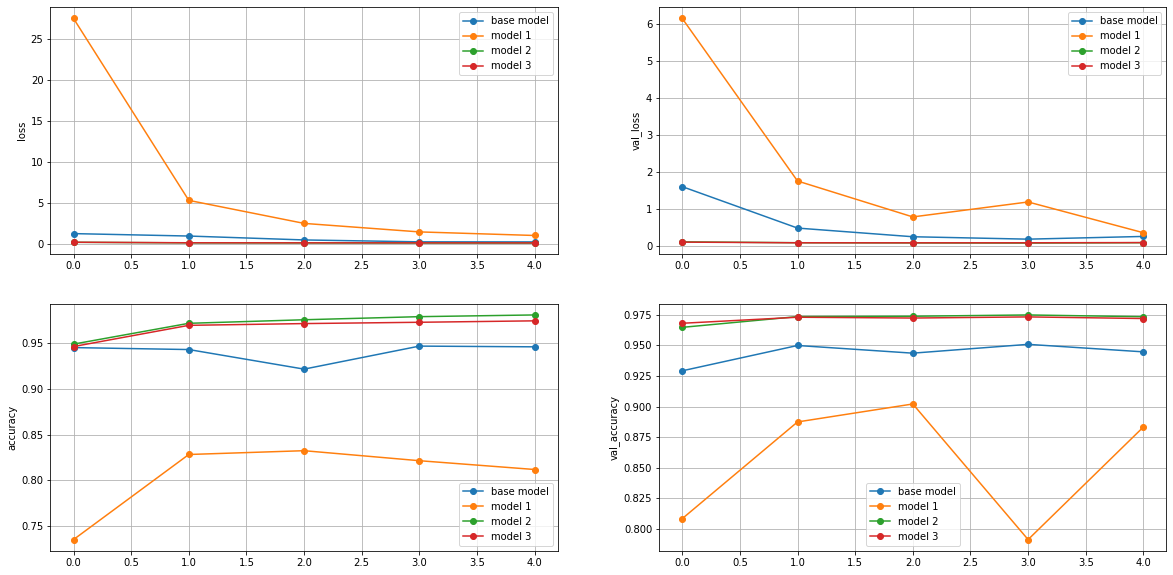

In [45]:
hist_dict = {'base model': history_base, 'model 1': history_1, 'model 2': history_2, 'model 3': history_3}
plot_metrics(histos = hist_dict)

In [46]:
print(f'''
          base model accuracy : {result_base}
          model_1             : {result_m1}
          model_2             : {result_m2}
          model_3             : {result_m3}''')


          base model accuracy : [0.28381139039993286, 0.9469333291053772]
          model_1             : [0.35564690828323364, 0.8799999952316284]
          model_2             : [0.0773351788520813, 0.9742666482925415]
          model_3             : [0.08279530704021454, 0.9710666537284851]


In [47]:
from sklearn.metrics import  recall_score, precision_score, f1_score, accuracy_score
all_preds = {'base model':ypred_base, 'model 1':ypred_m1,'model 2': ypred_m2,'model 3': ypred_m3}

all_recalls = [recall_score(ytrue,j, average = 'macro') for j in all_preds.values()]
all_precisions = [precision_score(ytrue,j, average = 'macro') for j in all_preds.values()]
all_f1scores = [f1_score(ytrue,j, average = 'macro') for j in all_preds.values()]
all_accuracies  = [accuracy_score(ytrue,j) for j in all_preds.values()]
all_models = [j for j in all_preds.keys()]

data = {'Model':all_models, 
        'precision': all_precisions, 
        'recall': all_recalls, 
        'f1 score': all_f1scores, 
        'accuracy': all_accuracies}
        
import pandas as pd
model_metrics = pd.DataFrame(data)
model_metrics


,Model,precision,recall,f1 score,accuracy
0,base model,0.949006,0.946933,0.947391,0.946933
1,model 1,0.880304,0.880000,0.879779,0.880000
2,model 2,0.974360,0.974267,0.974255,0.974267
3,model 3,0.971474,0.971067,0.971110,0.971067


# Conclusion
 although `model_1` has the best scores it is better to use `model_3` as it 
 has been trained with Augmentation. It will generelize and perform better on rice image regardless of there alignment.

In [49]:
#saving the Model3 and Model2
model_2.save('CNN_model2_rice_image_dataset.h5')
model_3.save('CNN_with_augmentation_model3_rice_image_dataset.h5')

In [48]:
!tensorboard dev upload --logdir tensorboard_log \
    --name "ann vs cnn" \
    --description "performance check of various model"


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

tensorboard_log

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=hBOUkCTaVyRN0zg2yhTw3geHVvW0mx&prompt=consent&access_type=offli

In [50]:
!ls -la

total 235588
drwxr-xr-x 1 root root      4096 Sep 11 08:05 .
drwxr-xr-x 1 root root      4096 Sep 11 07:20 ..
-rw-r--r-- 1 root root   5829012 Sep 11 08:05 CNN_model2_rice_image_dataset.h5
-rw-r--r-- 1 root root   5829292 Sep 11 08:05 CNN_with_augmentation_model3_rice_image_dataset.h5
drwxr-xr-x 4 root root      4096 Aug 31 13:47 .config
drwxr-xr-x 5 root root      4096 Sep 11 07:26 Rice_Image_Dataset
-rw-r--r-- 1 root root 229550800 Apr  3 02:16 Rice_Image_Dataset.zip
drwxr-xr-x 1 root root      4096 Aug 31 13:47 sample_data
drwxr-xr-x 6 root root      4096 Sep 11 07:48 tensorboard_log
